In [1]:
import pickle 
import os
import torch
import os.path


In [2]:
from transformers import RobertaTokenizerFast
from pathlib import Path
tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)

checkpoints = [str(x) for x in Path("/data/loriss21dm/babylm/TODO/").glob("checkpoint-*") if (int(str(x).split("-")[-1]) % 50000) == 0]#if (int(str(x).split("-")[-1] % 1000)) == 0]
checkpoints = checkpoints[0:12]
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)
from datasets import load_dataset
dataset = load_dataset("text", data_dir="/data/loriss21dm/babylm/train_test/")
#dataset.set_transform(lambda x : tokenizer(x["text"], return_special_tokens_mask=True, truncation=True, padding="max_length", max_length=512))



/data/loriss21dm/TracInVenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/loriss21dm/TracInVenv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
2024-10-09 13:09:46.991603: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 13:09:47.027854: E externa

In [3]:
#   

In [4]:
# len(dataset["train"]) / 1000

In [5]:
# ((len(dataset["train"]) / 1000)*751)/1000

In [6]:

# BATCH_SIZE = 1000
# def get_all_chunks(checkpoint_path):
#     _, start, end = "/data/loriss21dm/babylm/results/100000_65000_66000".split("_")
#     BATCH_SIZE = int(end) - int(start)
#     return [checkpoint_path.split("_")[-3] + "_" + str(i) + "_" + str(i + BATCH_SIZE) for i in range(0, len(dataset["train"]), BATCH_SIZE)][0:100]
# def all_chunks_done_for_checkpoint(checkpoint_path):
#     return all([os.path.isfile(chunk) for chunk in get_all_chunks(checkpoint_path)])
# all_chunks_done_for_checkpoint("/data/loriss21dm/babylm/results/100000_65000_66000")

In [7]:
# for chunk in get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"):
#     gradients_at_checkpoint = torch.load(chunk,weights_only=True,map_location="cpu")
#     break

In [8]:
# len(get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"))

In [9]:
# from tqdm import tqdm

In [10]:
# checkpoint_path = "/data/loriss21dm/babylm/results/100000_65000_66000"

In [11]:
# [torch.load(chunk, weights_only=True,map_location="cpu") for chunk in get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000")[0:2]]

In [12]:
# gradients_at_checkpoint = torch.concat([torch.load(chunk, weights_only=True,map_location="cpu") for chunk in tqdm(get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"), desc="Loading checkpoint chunks from disk")]).flatten(1)#.to(torch.float)

In [13]:
# def get_mean_influence_at_checkpoint_at(checkpoint_path):
#     with torch.no_grad(): # TODO redundant
#         gradients_at_checkpoint = torch.concat([torch.load(chunk, weights_only=True,map_location="cpu") for chunk in tqdm(get_all_chunks(checkpoint_path), desc="Loading checkpoint chunks from disk")]).flatten(1)
#         return (gradients_at_checkpoint @ gradients_at_checkpoint.transpose(1, 0)).mean(1)

In [14]:
# def get_mean_influence_at_checkpoint(checkpoint_path):
#     with torch.no_grad(): # TODO redundant
#         gradients_at_checkpoint = torch.concat([torch.load(chunk, weights_only=True,map_location="cpu") for chunk in tqdm(get_all_chunks(checkpoint_path), desc="Loading checkpoint chunks from disk")]).unsqueeze(0)
#         t_flat = gradients_at_checkpoint.flatten(-2,-1)
#         return torch.bmm(t_flat, torch.transpose(t_flat, 1,2)).mean(1)

In [15]:
# def get_mean_influence_at_checkpoint_einsum(checkpoint_path):
    
#     gradients_at_checkpoint = torch.concat([torch.load(chunk, weights_only=True,map_location="cpu") for chunk in tqdm(get_all_chunks(checkpoint_path), desc="Loading checkpoint chunks from disk")]).flatten(1)
#   #  print(gradients_at_checkpoint.shape)
#     return (torch.einsum('ik, kj -> i', gradients_at_checkpoint, gradients_at_checkpoint.T) / gradients_at_checkpoint.shape[0]).unsqueeze(0)

In [16]:
# def get_mean_influence_at_checkpoint_chunked(checkpoint_path):
#     gradients_at_checkpoint = torch.zeros((len(dataset["train"],)))#.to("cuda:0")
#     for chunk_path_a in tqdm(get_all_chunks(checkpoint_path), desc="Calculating chunk-wise mean influence"):
#         _, start_id_a, stop_id_a = chunk_path_a.split( "_")
#         start_id_a = int(start_id_a)
#         stop_id_a = int(stop_id_a)
#         chunk_a = torch.load(chunk_path_a, weights_only=True,map_location="cpu").flatten(1)
#         for chunk_path_b in get_all_chunks(checkpoint_path):
#             _, start_id_b, stop_id_b = chunk_path_b.split( "_")
        
#             start_id_b = int(start_id_b)
#             stop_id_b = int(stop_id_b)

#             #print(chunk_path_a, chunk_path_b)
            
#             chunk_b = torch.load(chunk_path_b, weights_only=True,map_location="cpu").flatten(1)

#             gradients_at_checkpoint[start_id_a:stop_id_a] += torch.einsum('ik, kj -> i', chunk_a, chunk_b.T)
#     return (gradients_at_checkpoint / len(dataset["train"])).unsqueeze(0) 


In [17]:
# def get_mean_influence_at_checkpoint_chunked(checkpoint_path):
#     gradients_at_checkpoint = torch.zeros((len(dataset["train"],)))#.to("cuda:0")
#     for chunk_path_a in tqdm(get_all_chunks(checkpoint_path), desc="Calculating chunk-wise mean influence"):
#         _, start_id_a, stop_id_a = chunk_path_a.split( "_")
#         start_id_a = int(start_id_a)
#         stop_id_a = int(stop_id_a)
#         chunk_a = torch.load(chunk_path_a, weights_only=True,map_location="cpu").flatten(1)
#         for chunk_path_b in get_all_chunks(checkpoint_path):
#             _, start_id_b, stop_id_b = chunk_path_b.split( "_")
        
#             start_id_b = int(start_id_b)
#             stop_id_b = int(stop_id_b)

#             #print(chunk_path_a, chunk_path_b)
            
#             chunk_b = torch.load(chunk_path_b, weights_only=True,map_location="cpu").flatten(1)

#             gradients_at_checkpoint[start_id_a:stop_id_a] += torch.einsum('ik, kj -> i', chunk_a, chunk_b.T)
#     return (gradients_at_checkpoint / len(dataset["train"])).unsqueeze(0) 


In [18]:
!mkdir results2

mkdir: cannot create directory ‘results2’: File exists


In [19]:
import psutil
((psutil.virtual_memory().available >> 20)/750)*0.8

335.7130666666667

In [20]:
((677/90)*30)/60

3.761111111111111

In [21]:
%%writefile merge.py
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TOKENIZERS_PARALLELISM"] = "False"
os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'
import traceback


# cache = {} 
# import random 
# def get_cached(tensor_path, device, cache):

#     #return torch.load(tensor_path, weights_only=True,map_location=device).flatten(1)
#     if tensor_path in cache:
#         # cache[tensor_path] = (cache[tensor_path][0]+1, cache[tensor_path][1])
#             return cache[tensor_path]
#     else:
        
#         if len(cache) >= CACHE_SIZE:
#             cache.pop(random.choice(cache.keys()))
#         cache[tensor_path] = torch.load(tensor_path, 
#       #  print(cache, flush=True)
#         return cache[tensor_path]

def run(chunk_path_a, start_id_a, stop_id_a, subtasks):
   # print("start",start_id_a, stop_id_a, flush=True)
    import torch
    import numpy as np
    from tqdm import tqdm
    gpu_id = queue.get()
    device = "cpu"#"cuda:" + str(gpu_id)
    
    try:
        with torch.no_grad():
       #     print("start", start_id_a, stop_id_a, flush=True)
            chunk_a = torch.load(chunk_path_a, weights_only=True,map_location=device).flatten(1)
           # print("f", flush=True)
            result = torch.zeros((chunk_a.shape[0])).to(device)
            # return (start_id_a, stop_id_a, result.cpu())
        # return (start_id_a, stop_id_a, result)
            for chunk_path_b,start_id_b, stop_id_b in tqdm(subtasks, leave=False):
                chunk_b = torch.load(chunk_path_b, weights_only=True,map_location=device).flatten(1)
               # print("loaded", flush=True)
               # print(chunk_b.shape,flush=True)
                
                # print(chunk_a.shape, chunk_b.shape, flush=True)
                # print(torch.einsum('ik, kj -> i', chunk_a[0:10], chunk_b[0:10].T), flush=True)
                result  += torch.einsum('ik, kj -> i', chunk_a, chunk_b.T)
                
                #print("t", start_id_b, stop_id_b, flush=True)
            #print("result", result.shape, flush=True)
       #     print("got", start_id_a, stop_id_a, flush=True)
            queue.put(gpu_id)
            # print("aaaaaaaa", )
            return (start_id_a, stop_id_a, result)

    except Exception as e:
        print(traceback.format_exc(),flush=True)
        raise e
###############
from multiprocessing import Pool, current_process
import time 
import datetime
import os
from pathlib import Path
import torch
from itertools import cycle
os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'
# # import multiprocessing as mp
# # mp.set_start_method('spawn', force=True)



from multiprocessing import Pool,Queue,Manager

# def f(x):
#     return x*x
import multiprocessing as mp

if __name__ == '__main__':
    mp.set_start_method('fork')
    import os
    os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
    os.environ["TOKENIZERS_PARALLELISM"] = "False"
    os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'
    from transformers import RobertaConfig,AutoConfig
    from transformers import RobertaForMaskedLM
    import torch
    from tqdm import tqdm
    from transformers import RobertaTokenizerFast
    from transformers import DataCollatorForLanguageModeling
    tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=True, mlm_probability=0.15
    )
    from datasets import load_dataset
    dataset = load_dataset("text", data_dir="/data/loriss21dm/babylm/train_test/")
    dataset.set_transform(lambda x : tokenizer(x["text"], return_special_tokens_mask=True, truncation=True, padding="max_length", max_length=512))


    
    def get_all_chunks(checkpoint_path):
        BATCH_SIZE = 1000
        return [ "./results/"  + checkpoint_path.split("-")[-1] + "_" + str(i) + "_" + str(i + BATCH_SIZE) for i in range(0, len(dataset["train"]), BATCH_SIZE)]#[0:100]

    #.to("cuda:0")
# torch.zeros((chunk_a.shape[0]))
   
    
    



    PROCCESSES = 90
    NUM_GPUS = 2



   
   

    queue = Queue()
    NUM_GPUS = 2
    for _ in range(PROCCESSES//NUM_GPUS):
        for i in range(NUM_GPUS):
            queue.put(i)

    with Pool(PROCCESSES) as p:
        checkpoints = [str(x) for x in Path("/data/loriss21dm/babylm/TODO/").glob("checkpoint-*") if (int(str(x).split("-")[-1]) % 50000) == 0]#if (int(str(x).split("-")[-1] % 1000)) == 0]
        checkpoints = checkpoints#[0:2]
        for checkpoint_path in tqdm(checkpoints, desc="Running for checkpoints", leave=False):
            result_checkpoint = torch.zeros((len(dataset["train"])))
            out_path = os.path.join("./results2/", checkpoint_path.split("-")[-1])
            print(out_path, checkpoint_path)
            if os.path.isfile(out_path):
                True
                #continue

            tasks = []
            for chunk_path_a in get_all_chunks(checkpoint_path):
                _, start_id_a, stop_id_a = chunk_path_a.split( "_")
                start_id_a = int(start_id_a)
                stop_id_a = int(stop_id_a)
                subtasks = []
                for chunk_path_b in get_all_chunks(checkpoint_path):
                    _, start_id_b, stop_id_b = chunk_path_b.split( "_")
                    start_id_b = int(start_id_b)
                    stop_id_b = int(stop_id_b)
                    subtasks.append((chunk_path_b,start_id_b, stop_id_b))
                tasks.append((chunk_path_a, start_id_a, stop_id_a, subtasks))






            




            r = p.starmap(run, tasks )
            # r.wait()
            print("merging", flush=True) 
            for start_id_a, _, rr in r:
                # print(start_id_a, stop_id_b, start_id_a + rr.shape[0])
                #  print("jjj",rr.shape, (result[start_id_a:start_id_a + rr.shape[0]]).shape)
                # print("before", result_checkpoint.shape)
                result_checkpoint[start_id_a:start_id_a + rr.shape[0]] += rr #  the stop_ids are taken from the task description in if.ipynb and can therefore be higher than the actual lenght
                # print("after", result_checkpoint.shape)

            result_checkpoint = (result_checkpoint / len(dataset["train"])).unsqueeze(0) 
            # print(result.shape)
            
            print("saving", out_path, flush=True)    
            torch.save(result_checkpoint, out_path)
# pickle.dump( result, open( "./results/"+(path.split("-")[-1]), "wb" ) )


Overwriting merge.py


In [22]:
# %run merge.py

In [23]:
# dataset["train"]["text"]

In [24]:
import pandas as  pd
import os
import torch
import numpy as np
# pd.DataFrame(a)

In [25]:

df = pd.DataFrame({result_checkpoint: torch.load(os.path.join("./results2/",result_checkpoint),weights_only=True,map_location="cpu").numpy().flatten() for result_checkpoint in os.listdir("./results2")})
# df = df.rename({0: "influence"}, axis=1)
df.index = df.index.rename("document_id")
df["total"] = df.sum(axis=1)
df["text"] = dataset["train"].to_pandas()
df

,100000,50000,150000,total,text
document_id,,,,,
0,-0.000595,-0.000072,0.000004,-0.000663,= = = PG21374 = = =
1,0.000379,0.000225,-0.000127,0.000477,!TENTION: A STORY OF BOY-LIFE DURING THE PENIN...
2,0.000660,0.000464,0.001031,0.002155,"Produced by Nick Hodson of London, England"
3,0.000282,0.000187,0.000283,0.000752,"!Tention, a Story of Boy-Life during the Penin..."
4,0.000000,-0.001105,0.000000,-0.001105,______________________________________________...
...,...,...,...,...,...
676009,0.000000,0.000000,0.000000,0.000000,Page 242 out of your gripe _changed to_ out of...
676010,0.000000,0.000000,0.000000,0.000000,Page 326 20. HARDSCRABBLE OF ELM ISLAND _chang...
676011,0.000000,0.000000,0.000000,0.000000,Number 32 in the list of books or the Fortunes...


In [26]:
STAGES = os.listdir("./results2")
NUM_STAGES = len(STAGES)
NUM_STAGES

3

In [27]:
NUM_DOCS_STAGE = len(df) // NUM_STAGES
NUM_DOCS_STAGE

225338

In [28]:
NUM_DOCS_STAGE

225338

In [29]:
NUM_DOCS_STAGE*3

676014

In [30]:
def influence_stage(df, stage):
    return df[stage].nlargest(NUM_DOCS_STAGE).sum()
influence_stage(df, "50000")

2.8313808

In [31]:
[influence_stage(df, t) for t in STAGES]

[4.176044, 2.8313808, 3.2834117]

In [32]:
# take NUM_DOCS_STAGE of each stage
len(set.union(*[set(df[s].nlargest(NUM_DOCS_STAGE).index) for s in STAGES]))

225871

In [33]:
# maximize with budget

In [34]:
influence_col = lambda col, selection : selection[col].sum()

In [35]:
influence_col("50000", df)

2.7947662

In [36]:
selection = df[200:300]

In [37]:
#       sum
score = sum([influence_col(s, selection) for s in  STAGES])
score

0.04796267207711935

In [38]:
n = df[STAGES].to_numpy()[0:1000,:]
n.shape

(1000, 3)

In [39]:
np.arange(0,n.shape[1], 1)

array([0, 1, 2])

In [40]:
np.convolve(n[0,:],np.array([0,1,0])).shape

(5,)

In [41]:
np.apply_along_axis(lambda m: np.convolve(m, np.array([1,3,1]), mode='full'), axis=0, arr=n).shape

(1002, 3)

In [42]:
from scipy.stats import norm
from scipy.stats import f
from scipy.stats import lognorm

In [43]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
size=len(STAGES)
print(size)
def gaussian_filter(size, **args):
    print(args)
    indices = np.arange(-size, size+1, 1)
    weights =  norm.pdf(indices, **args)
    return weights# / np.sum(weights)


def f_filter(size, **args):
    print(args)
    indices = np.arange(-size, size+1, 1)
    print(indices)
    weights = f.pdf(indices+1, **args)
    return weights# / np.sum(weights)
def lognorm_filter(size, **args):
    #print(args)
    indices = np.arange(-size, size+1, 1)
    #print(indices)
    weights = lognorm.pdf(indices+1, **args)
    return weights / np.sum(weights)




3


In [44]:
# filter_weights = f_filter(size, dfn=15, dfd=3)
# print(filter_weights)
# plt.plot(np.arange(-size,size, 1),filter_weights)
# plt.vlines(0, ymin=0, ymax=max(filter_weights)+0.1, colors=["red"])

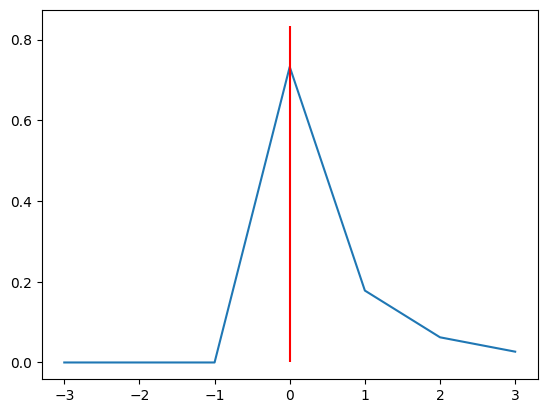

In [45]:

filter_weights = lognorm_filter(size, s=1, loc=0, scale=0.5)
plt.plot(np.arange(-size,size+1, 1),filter_weights)
plt.vlines([0], ymin=0, ymax=max(filter_weights)+0.1, colors=["red"])


In [46]:
filter_weights

array([0.        , 0.        , 0.        , 0.73264085, 0.17818617,
       0.06236903, 0.02680395])

In [47]:
NUM_STAGES

3

In [48]:
a = [1000,10,1,]
np.convolve(a,filter_weights, mode="full")

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.32640851e+02,
       1.85512580e+02, 6.48835321e+01, 2.76058246e+01, 3.30408511e-01,
       2.68039481e-02])

In [49]:
n = df[STAGES].to_numpy()#[0:1000,:]
scores = np.apply_along_axis(lambda m: np.convolve(m,filter_weights, mode="valid")[1:-1], axis=1, arr=n)
scores.shape

(676014, 3)

In [50]:
df_usefulness = df.copy()
df_usefulness[STAGES] = np.apply_along_axis(lambda m: np.convolve(m,filter_weights, mode="valid")[1:-1], axis=1, arr=n)
df_usefulness["total"] = df_usefulness[STAGES].sum(axis=1)

In [51]:
df.sort_values(by="total", ascending=False)

,100000,50000,150000,total,text
document_id,,,,,
1859,0.007310,0.000000,0.011932,0.019242,"""Listen."""
1105,0.002396,0.003626,0.011488,0.017509,"""Do you feel so hungry now, Punch?"""
2177,0.009301,0.007586,0.000558,0.017446,"""Back to prison."""
9820,0.012525,0.003974,0.000082,0.016581,"""Ugh!"" shuddered Aileen."
936,0.009694,0.006130,0.000000,0.015824,"""I can't, Punch."""
...,...,...,...,...,...
8038,0.000065,0.000000,-0.001429,-0.001363,Ranworth shook his head.
3518,-0.000091,0.000000,-0.001398,-0.001489,"EDINBURGH, 1870"
1625,-0.001910,0.000000,0.000314,-0.001596,"""_Frances_?"" he said."


In [52]:
df_usefulness = df_usefulness.sort_values(by="total", ascending=False)
df_usefulness

,100000,50000,150000,total,text
document_id,,,,,
2177,0.006815,0.007215,0.002341,0.016371,"""Back to prison."""
9820,0.009176,0.005143,0.001549,0.015869,"""Ugh!"" shuddered Aileen."
1859,0.005356,0.001303,0.009198,0.015856,"""Listen."""
936,0.007102,0.006219,0.001697,0.015018,"""I can't, Punch."""
9148,0.003666,0.006296,0.004129,0.014091,"""You aren’t afraid?"" he asked."
...,...,...,...,...,...
9967,-0.000870,-0.000212,-0.000074,-0.001155,Joe grinned happily.
4192,-0.001106,-0.000124,-0.000047,-0.001277,"Carrots got slowly down off his high chair, an..."
8994,-0.000391,-0.000876,-0.000286,-0.001553,Perhaps so.


In [53]:
df_usefulness.sort_values(by=STAGES[0], ascending=False)[0:NUM_DOCS_STAGE]

,100000,50000,150000,total,text
document_id,,,,,
4266,0.009384,0.002282,0.000837,0.012504,"""No,"" agreed Carrots again, ""we never did."""
4777,0.009225,0.002244,0.000785,0.012254,"""Yes."""
9820,0.009176,0.005143,0.001549,0.015869,"""Ugh!"" shuddered Aileen."
4026,0.008605,0.002091,0.000969,0.011664,"""Thou will not fail To listen to a fairy tale."""
7751,0.008308,0.002161,0.000741,0.011210,"""Nine."""
...,...,...,...,...,...
228173,0.000000,0.000000,0.000000,0.000000,"Antony Blake--or Frank Antony Blake, to give h..."
228115,0.000000,0.000000,0.000000,0.000000,"'Well,' said the young fellow, 'I have a sweet..."
228127,0.000000,0.000000,0.000000,0.000000,"It was getting early dark to-night, and one gr..."


In [62]:

df_usefulness_ = df_usefulness.copy()
for stage in STAGES:
    pd.concat([df_usefulness_,df_usefulness.sort_values(by=STAGES[1], ascending=False)]).drop_duplicates(keep="first")[0:2*NUM_DOCS_STAGE]

In [84]:
df_usefulness

,100000,50000,150000,total,text
document_id,,,,,
2177,0.006815,0.007215,0.002341,0.016371,"""Back to prison."""
9820,0.009176,0.005143,0.001549,0.015869,"""Ugh!"" shuddered Aileen."
1859,0.005356,0.001303,0.009198,0.015856,"""Listen."""
936,0.007102,0.006219,0.001697,0.015018,"""I can't, Punch."""
9148,0.003666,0.006296,0.004129,0.014091,"""You aren’t afraid?"" he asked."
...,...,...,...,...,...
9967,-0.000870,-0.000212,-0.000074,-0.001155,Joe grinned happily.
4192,-0.001106,-0.000124,-0.000047,-0.001277,"Carrots got slowly down off his high chair, an..."
8994,-0.000391,-0.000876,-0.000286,-0.001553,Perhaps so.


In [91]:
df_usefulness_ = df_usefulness.copy()
dfs_selection = []
for stage in STAGES:
    dfs_selection.append(df_usefulness_.nlargest(NUM_DOCS_STAGE, columns=stage))
    df_usefulness_ = df_usefulness_.nsmallest(len(df_usefulness_) - NUM_DOCS_STAGE, columns=stage)
    print(len(df_usefulness_))
print(len(df_usefulness_))
for a in dfs_selection:
    display(a)

450676
225338
0
0


,100000,50000,150000,total,text
document_id,,,,,
4266,0.009384,0.002282,0.000837,0.012504,"""No,"" agreed Carrots again, ""we never did."""
4777,0.009225,0.002244,0.000785,0.012254,"""Yes."""
9820,0.009176,0.005143,0.001549,0.015869,"""Ugh!"" shuddered Aileen."
4026,0.008605,0.002091,0.000969,0.011664,"""Thou will not fail To listen to a fairy tale."""
7751,0.008308,0.002161,0.000741,0.011210,"""Nine."""
...,...,...,...,...,...
659369,0.000000,0.000000,0.000000,0.000000,"“Well, I hope you’ll try for the crew,” answer..."
659401,0.000000,0.000000,0.000000,0.000000,When the door had closed again Dick took up th...
659402,0.000000,0.000000,0.000000,0.000000,"“Dear Dick” (it ran), “Wheels has sent for me ..."


,100000,50000,150000,total,text
document_id,,,,,
744,0.000000,0.006352,0.001545,0.007896,"""No."""
9160,0.000000,0.005938,0.002815,0.008753,"""And for you?"""
426,-0.000146,0.005933,0.001462,0.007249,"""Think so?"""
9129,0.000000,0.005925,0.001721,0.007646,"""Of course. What will happen?"""
2514,0.000000,0.005742,0.001397,0.007139,"""So's mine. I say, don't they ache?"""
...,...,...,...,...,...
666904,0.000000,0.000000,0.000000,0.000000,"“Thank you, my dear young ‘maw,’ but you will ..."
666905,0.000000,0.000000,0.000000,0.000000,CHAPTER XIII
666906,0.000000,0.000000,0.000000,0.000000,THE MYSTERIOUS GIRL


,100000,50000,150000,total,text
document_id,,,,,
1217,0.000000,0.000000,0.008638,0.008638,"""No."""
2025,0.000000,0.000000,0.006068,0.006068,"""Which way?"""
1673,0.000000,0.000000,0.004493,0.004493,"""But--"""
463,0.000000,0.000000,0.003912,0.003912,"""Bread."""
743,0.000000,0.000000,0.003774,0.003774,"""You don't?"""
...,...,...,...,...,...
9967,-0.000870,-0.000212,-0.000074,-0.001155,Joe grinned happily.
8011,-0.000123,-0.000045,-0.000147,-0.000315,"On the windward side of the huts, dome-shaped ..."
8552,-0.000006,-0.000001,-0.000250,-0.000257,THE SCOUT LIBRARY STORIES OF ADVENTURE.


In [78]:
df_usefulness

,100000,50000,150000,total,text
document_id,,,,,
2177,0.006815,0.007215,0.002341,0.016371,"""Back to prison."""
9820,0.009176,0.005143,0.001549,0.015869,"""Ugh!"" shuddered Aileen."
1859,0.005356,0.001303,0.009198,0.015856,"""Listen."""
936,0.007102,0.006219,0.001697,0.015018,"""I can't, Punch."""
9148,0.003666,0.006296,0.004129,0.014091,"""You aren’t afraid?"" he asked."
...,...,...,...,...,...
9967,-0.000870,-0.000212,-0.000074,-0.001155,Joe grinned happily.
4192,-0.001106,-0.000124,-0.000047,-0.001277,"Carrots got slowly down off his high chair, an..."
8994,-0.000391,-0.000876,-0.000286,-0.001553,Perhaps so.


In [ ]:
def curriculize(df):
    

In [415]:
np.convolve(n[1,:],filter_weights, mode="full").shape

(9,)

In [394]:
c = np.convolve(n[0,:],filter_weights, mode="full")
c

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.35944797e-04,
       -1.58928861e-04, -4.67267044e-05, -1.96619876e-05, -1.65867393e-06,
        1.18949971e-07])

In [335]:

a = np.arange(10)
a = np.vstack((a,a)).T
print(a)
filt = np.ones(3)

np.apply_along_axis(lambda m: np.convolve(m, filt, mode='full'), axis=0, arr=a)

[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]]


array([[ 0.,  0.],
       [ 1.,  1.],
       [ 3.,  3.],
       [ 6.,  6.],
       [ 9.,  9.],
       [12., 12.],
       [15., 15.],
       [18., 18.],
       [21., 21.],
       [24., 24.],
       [17., 17.],
       [ 9.,  9.]])

In [336]:
np.array([0,1,0])

array([0, 1, 0])

In [337]:
df.sort_values(by="50000", ascending=False)

,100000,50000,150000,total,text
document_id,,,,,
744,0.000000,0.008670,0.000000,0.008670,"""No."""
9724,0.000350,0.008310,0.000344,0.009005,"""Had to! I’d have seen them shot first!"" Tom ..."
2829,0.000264,0.008285,0.000000,0.008549,"""No."""
973,0.001230,0.008178,0.000000,0.009408,"""What is it?"" cried Pen."
426,-0.000200,0.008147,0.000031,0.007978,"""Think so?"""
...,...,...,...,...,...
2046,0.001661,-0.000650,0.000257,0.001268,CHAPTER TWENTY NINE.
5792,0.000000,-0.000829,0.000172,-0.000657,The boys looked up and laughed at the irate li...
6904,0.000374,-0.001018,0.000035,-0.000610,The next minute two pairs of childish arms wer...


In [41]:
# slow = get_mean_influence_at_checkpoint("/data/loriss21dm/babylm/results/100000_65000_66000")
# fast = get_mean_influence_at_checkpoint_einsum("/data/loriss21dm/babylm/results/100000_65000_66000")
# cos = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)
# cos(fast,slow)

In [42]:
pd.DataFrame(

SyntaxError: incomplete input (2249411127.py, line 1)

In [16]:
# with torch.no_grad():
#     result = get_mean_influence_at_checkpoint_at("/data/loriss21dm/babylm/results/100000_65000_66000").shape
#     print(result.shape)

In [17]:
77590 / 95830

0.80966294479808

In [4]:
result = None

In [22]:
len(dataset["train"])

676014

In [49]:
gradients_at_checkpoint.shape

torch.Size([676014])

In [11]:
from itertools import product

In [80]:
len(dataset["train"],)*len(dataset["train"],)

456994928196

In [84]:
len((get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000")))

677

In [11]:
gradients_at_checkpoint = torch.zeros((len(dataset["train"],)))
for chunk_path_a in get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"):
    _, start_id_a, stop_id_a = chunk_path_a.split( "_")
    start_id_a = int(start_id_a)
    stop_id_a = int(stop_id_a)
    chunk_a = torch.load(chunk_path_a, weights_only=True,map_location="cpu").flatten(1)
    for chunk_path_b in get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"):
        _, start_id_b, stop_id_b = chunk_path_b.split( "_")
    
        start_id_b = int(start_id_b)
        stop_id_b = int(stop_id_b)

        print(chunk_path_a, chunk_path_b)
        
        chunk_b = torch.load(chunk_path_b, weights_only=True,map_location="cpu").flatten(1)
    # print(start_id_a, stop_id_a, start_id_b, stop_id_b)
        # print((torch.einsum('ik, kj -> i', chunk_a, chunk_b.T) / gradients_at_checkpoint.shape[0]).shape)
        # print(gradients_at_checkpoint[start_id_a:stop_id_a].shape)
        # print(torch.einsum('ik, kj -> i', chunk_a, chunk_b.T).shape)
        gradients_at_checkpoint[start_id_a:stop_id_a] += torch.einsum('ik, kj -> i', chunk_a, chunk_b.T) 
gradients_at_checkpoint

/data/loriss21dm/babylm/results/100000_0_1000 /data/loriss21dm/babylm/results/100000_0_1000
/data/loriss21dm/babylm/results/100000_0_1000 /data/loriss21dm/babylm/results/100000_1000_2000
/data/loriss21dm/babylm/results/100000_0_1000 /data/loriss21dm/babylm/results/100000_2000_3000
/data/loriss21dm/babylm/results/100000_1000_2000 /data/loriss21dm/babylm/results/100000_0_1000
/data/loriss21dm/babylm/results/100000_1000_2000 /data/loriss21dm/babylm/results/100000_1000_2000
/data/loriss21dm/babylm/results/100000_1000_2000 /data/loriss21dm/babylm/results/100000_2000_3000
/data/loriss21dm/babylm/results/100000_2000_3000 /data/loriss21dm/babylm/results/100000_0_1000
/data/loriss21dm/babylm/results/100000_2000_3000 /data/loriss21dm/babylm/results/100000_1000_2000
/data/loriss21dm/babylm/results/100000_2000_3000 /data/loriss21dm/babylm/results/100000_2000_3000


tensor([-108.3750,  264.9062,  436.5000,  ...,   22.7500,   28.6832,
          32.2500])

In [49]:
torch.allclose((gradients_at_checkpoint / 3000).float(), slow.flatten().float(), rtol=0.1)
cos = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)
cos((gradients_at_checkpoint / 3000).float(),slow.flatten().float())

tensor(1.0000)

In [46]:
(gradients_at_checkpoint / 3000).float()[2000:]

tensor([ 1.4850e-01,  8.4601e-03,  9.7833e-02,  4.5167e-02,  0.0000e+00,
         1.2292e-02,  2.4633e-01,  5.3978e-03,  0.0000e+00,  9.6896e-02,
         3.3250e-02,  9.8625e-02,  7.7773e-03,  3.7458e-02,  1.4412e-01,
         7.8302e-02,  3.8052e-02,  3.8573e-02,  7.4396e-02,  1.7613e-01,
         2.1374e-01,  1.0042e-02,  3.5327e-03,  2.4042e-02,  2.4813e-02,
         0.0000e+00,  5.5245e-02,  1.3771e-02,  1.1760e-02, -4.0417e-03,
         3.2250e-02,  3.5969e-01,  3.0286e-02,  1.8848e-01,  1.6517e-01,
         0.0000e+00,  3.1042e-02,  0.0000e+00,  1.6567e-01,  9.4896e-02,
         2.4958e-02,  1.8042e-02,  2.3238e-02,  1.0372e-02,  1.7880e-02,
         2.7904e-02,  1.5000e-01,  0.0000e+00,  1.1625e-02,  3.9130e-02,
         1.2589e-02,  2.7198e-02,  2.5135e-02,  1.6161e-02,  2.7250e-02,
         2.6323e-02,  2.1198e-02,  2.6313e-01,  1.1548e-01,  2.1115e-02,
         3.6875e-03,  3.2563e-02,  1.9875e-02,  1.2917e-02,  3.0167e-02,
         2.7552e-03,  4.4417e-02,  2.6875e-02,  1.7

In [45]:
slow[0,2000:]

tensor([ 1.4844e-01,  8.4229e-03,  9.8145e-02,  4.5410e-02,  0.0000e+00,
         1.2268e-02,  2.4609e-01,  5.4932e-03,  0.0000e+00,  9.7168e-02,
         3.3203e-02,  9.8633e-02,  7.7820e-03,  3.7598e-02,  1.4453e-01,
         7.8613e-02,  3.8086e-02,  3.8574e-02,  7.4219e-02,  1.7578e-01,
         2.1387e-01,  1.0010e-02,  3.5400e-03,  2.4048e-02,  2.5024e-02,
         0.0000e+00,  5.4932e-02,  1.3794e-02,  1.1780e-02, -4.0588e-03,
         3.2227e-02,  3.5938e-01,  3.0396e-02,  1.8848e-01,  1.6504e-01,
         0.0000e+00,  3.1128e-02,  0.0000e+00,  1.6504e-01,  9.5215e-02,
         2.4902e-02,  1.7944e-02,  2.3193e-02,  1.0376e-02,  1.7822e-02,
         2.7832e-02,  1.4941e-01,  0.0000e+00,  1.1597e-02,  3.9062e-02,
         1.2512e-02,  2.7100e-02,  2.5146e-02,  1.6235e-02,  2.7344e-02,
         2.6367e-02,  2.1240e-02,  2.6367e-01,  1.1572e-01,  2.1118e-02,
         3.6774e-03,  3.2715e-02,  1.9897e-02,  1.2878e-02,  3.0273e-02,
         2.7618e-03,  4.4434e-02,  2.6855e-02,  1.7

In [32]:
(gradients_at_checkpoint / 3000).float()

tensor([-0.0361,  0.0883,  0.1455,  ...,  0.0076,  0.0096,  0.0108])

In [31]:
(gradients_at_checkpoint / 3000).float() == slow.float()

tensor([[False, False, False,  ..., False, False, False]])

In [33]:
slow.float()

tensor([[-0.0361,  0.0884,  0.1455,  ...,  0.0076,  0.0096,  0.0107]])

In [21]:
slow

tensor([[-0.0361,  0.0884,  0.1455,  ...,  0.0076,  0.0096,  0.0107]],
       dtype=torch.bfloat16)

In [78]:
torch.all(gradients_at_checkpoint == 677)

tensor(True)

In [81]:
gradients_at_checkpoint.shape

torch.Size([676014])

In [ ]:
#with torch.no_grad(): # TODO redundant
for chunk in tqdm(get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"), desc="Loading checkpoint chunks from disk"):
    _, start_id, stop_id = chunk.split( "_")
    
# gradients_at_checkpoint.shape

In [ ]:
4tfeu0d9üp

In [ ]:
#with torch.no_grad(): # TODO redundant
for chunk in tqdm(get_all_chunks("/data/loriss21dm/babylm/results/100000_65000_66000"), desc="Loading checkpoint chunks from disk"):
    _, start_id, stop_id = chunk.split( "_")
gradients_at_checkpoint = 
[torch.load(chunk, weights_only=True,map_location="cpu") ]
# gradients_at_checkpoint.shape

Loading checkpoint chunks from disk: 100%|████████████████████████████████████████| 677/677 [05:19<00:00,  2.12it/s]


: 

: 

: 

: 

In [23]:
aaaaaw
def get_mean_influence_at_checkpoint_einsum_batched(checkpoint_path, batch_size=100000):

    # gradients_at_checkpoint = torch.concat([torch.load(chunk, weights_only=True,map_location="cpu") for chunk in tqdm(get_all_chunks(checkpoint_path), desc="Loading checkpoint chunks from disk")]).flatten(1)

    num_batches = (gradients_at_checkpoint.shape[0] + batch_size - 1) // batch_size  # Calculate number of batches
    results = []


    for i in range(num_batches):

        start = i * batch_size
        end = min((i + 1) * batch_size, gradients_at_checkpoint.shape[0])
        gradients_batch = gradients_at_checkpoint[start:end]
        print("gradients_batch",gradients_batch.shape)
        print("gradients_at_checkpoint.T", gradients_at_checkpoint.T.shape)
      
        batch_result = torch.einsum('ik, kj -> i', gradients_batch, gradients_at_checkpoint.T)
        results.append(batch_result)  
        print("batch_result", batch_result.shape)

    return (torch.concat(results) / gradients_at_checkpoint.shape[0]).unsqueeze(0)


In [24]:
slower = get_mean_influence_at_checkpoint_einsum_batched("/data/loriss21dm/babylm/results/100000_65000_66000")
slower.shape

gradients_batch torch.Size([200000, 393216])
gradients_at_checkpoint.T torch.Size([393216, 200000])
batch_result torch.Size([200000])


torch.Size([1, 200000])

In [25]:
# fast = (torch.einsum('ik, kj -> i', gradients_at_checkpoint, gradients_at_checkpoint.T) / gradients_at_checkpoint.shape[0]).unsqueeze(0)

In [26]:
# fast[0][100:200]

tensor([ 1.0449e-01, -7.6294e-03,  0.0000e+00,  1.6357e-02,  3.6621e-02,
         1.0742e-02, -3.3264e-03,  2.0898e-01,  4.6387e-02, -4.6997e-03,
         7.6904e-03,  3.0060e-03,  4.1199e-03,  1.5381e-02, -1.1978e-03,
        -1.3062e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  8.5449e-03,
         1.4465e-02,  3.4668e-02,  1.2970e-03,  6.6528e-03,  0.0000e+00,
         3.0212e-03,  9.7046e-03,  6.3419e-05,  9.2285e-02,  2.5787e-03,
         4.3457e-02,  9.9121e-02,  1.4725e-03,  1.2402e-01,  6.4392e-03,
         1.5527e-01,  0.0000e+00,  7.0190e-04,  0.0000e+00,  1.8311e-03,
        -2.6367e-02,  3.5248e-03, -5.6763e-03,  5.0049e-03,  2.7832e-02,
         1.5747e-02,  3.4668e-02,  3.1128e-03,  3.8477e-01,  9.2285e-02,
         8.3618e-03,  1.0132e-02,  1.9775e-02,  3.2349e-03,  4.7607e-02,
         5.6458e-03,  1.5869e-02,  1.8387e-03,  0.0000e+00,  2.4292e-02,
         2.1289e-01,  8.9844e-02,  1.2695e-02,  1.4465e-02,  1.8066e-01,
         5.3711e-03,  1.6357e-02,  3.4668e-02,  7.8

In [26]:
torch.allclose(slower, fast, rtol=0.1)

True